In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import savefig

plt.style.use("seaborn-v0_8-whitegrid")
%matplotlib inline

df = pd.read_csv("../online_shoppers_intention_data.csv")

# Coerce common booleans if read as strings
for col in ["Weekend", "Revenue"]:
    if col in df.columns and df[col].dtype == object:
        df[col] = df[col].map({"TRUE": True, "True": True, "FALSE": False, "False": False})

# Make Month categorical (ordered) if present
if "Month" in df.columns:
    month_order = ["Jan","Feb","Mar","Apr","May","June","Jul","Aug","Sep","Oct","Nov","Dec"]
    present = [m for m in month_order if m in df["Month"].unique().tolist()]
    df["Month"] = pd.Categorical(df["Month"], categories=present, ordered=True)

# Quick peek
display(df.head())

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [14]:
# Define which columns are numeric or categorical
num_cols = [c for c in [
    "Administrative", "Administrative_Duration",
    "Informational", "Informational_Duration",
    "ProductRelated", "ProductRelated_Duration",
    "BounceRates", "ExitRates",
    "PageValues", "SpecialDay"
] if c in df.columns]

cat_cols = [c for c in ["Month", "VisitorType", "Weekend", "Revenue"] if c in df.columns]

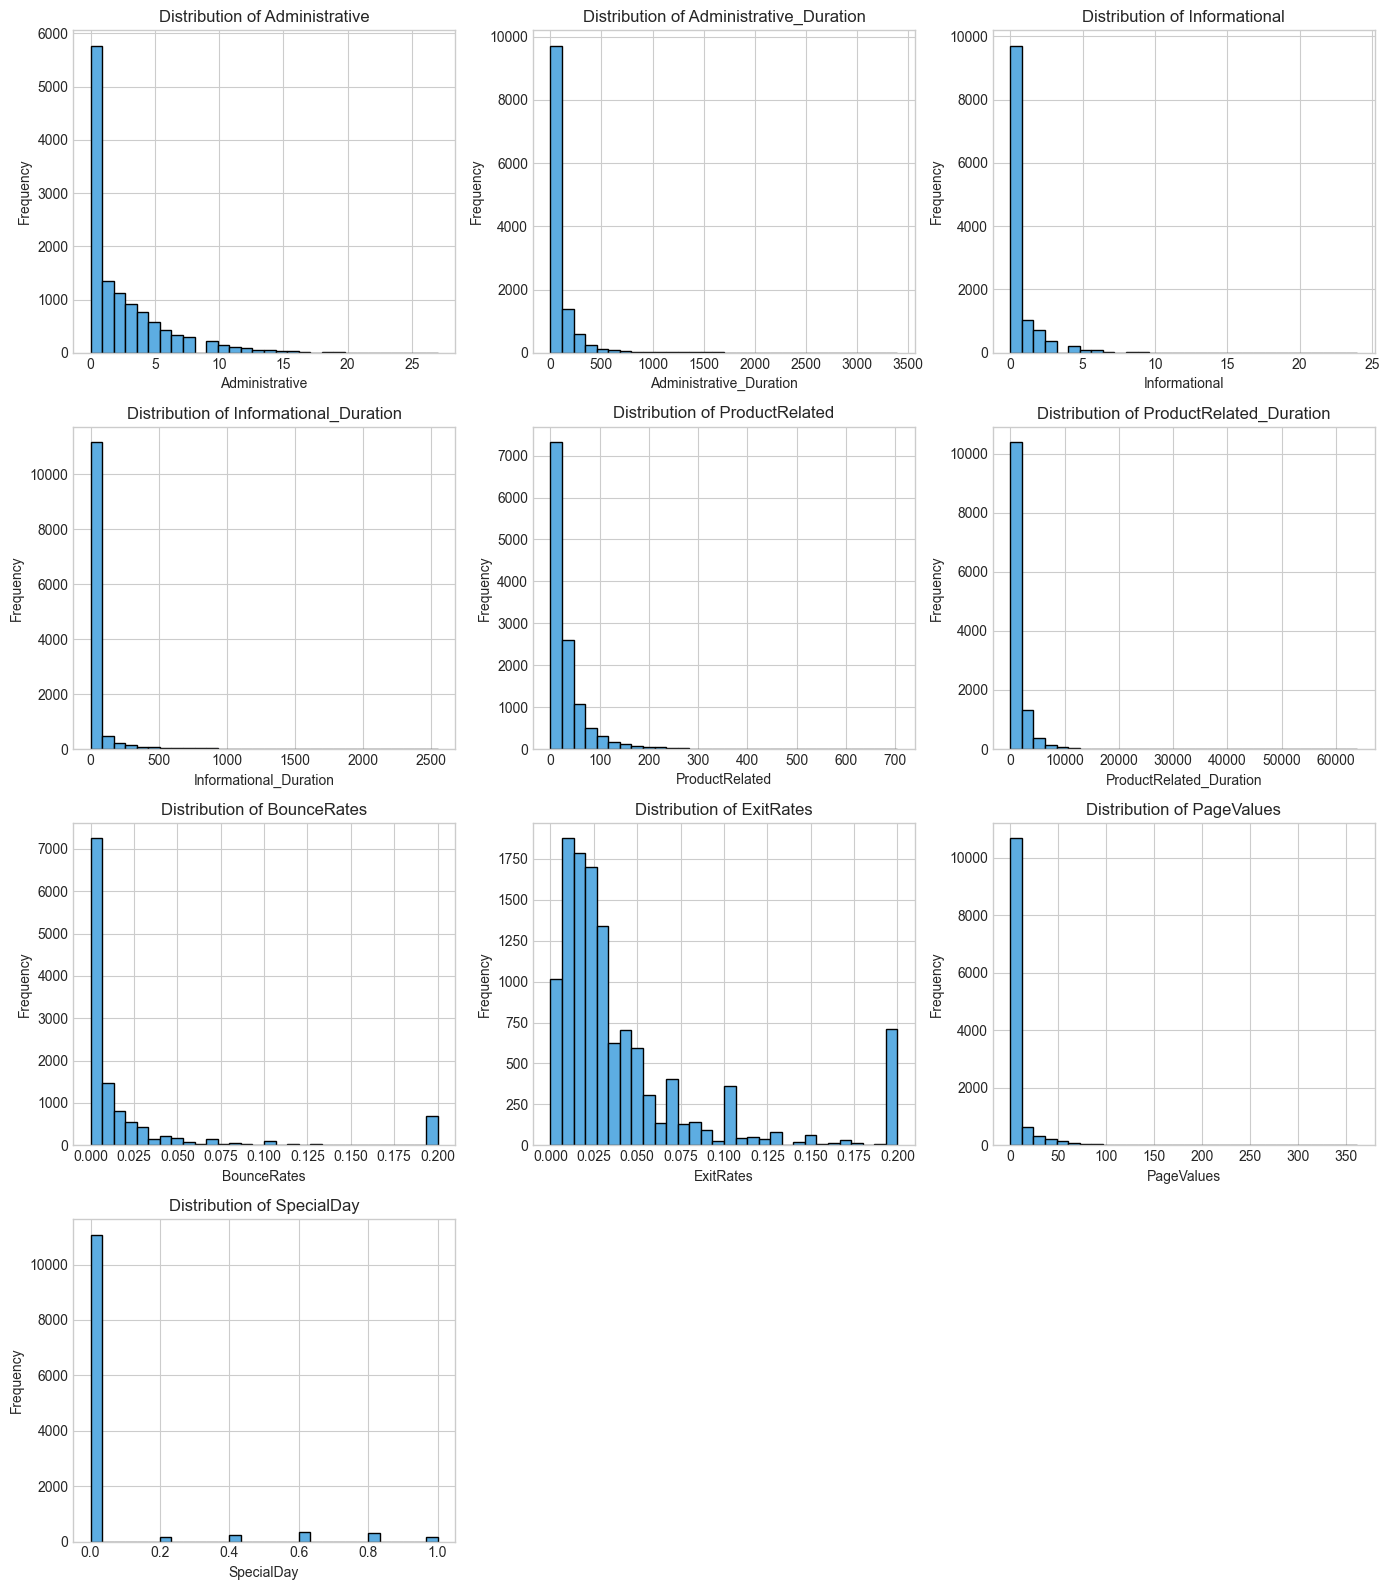

In [15]:
n = len(num_cols)
cols = 3
rows = int(np.ceil(n / cols))

fig, axes = plt.subplots(rows, cols, figsize=(14, 4*rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    df[col].plot(kind="hist", bins=30, ax=axes[i], color="#5DADE2", edgecolor="black")
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


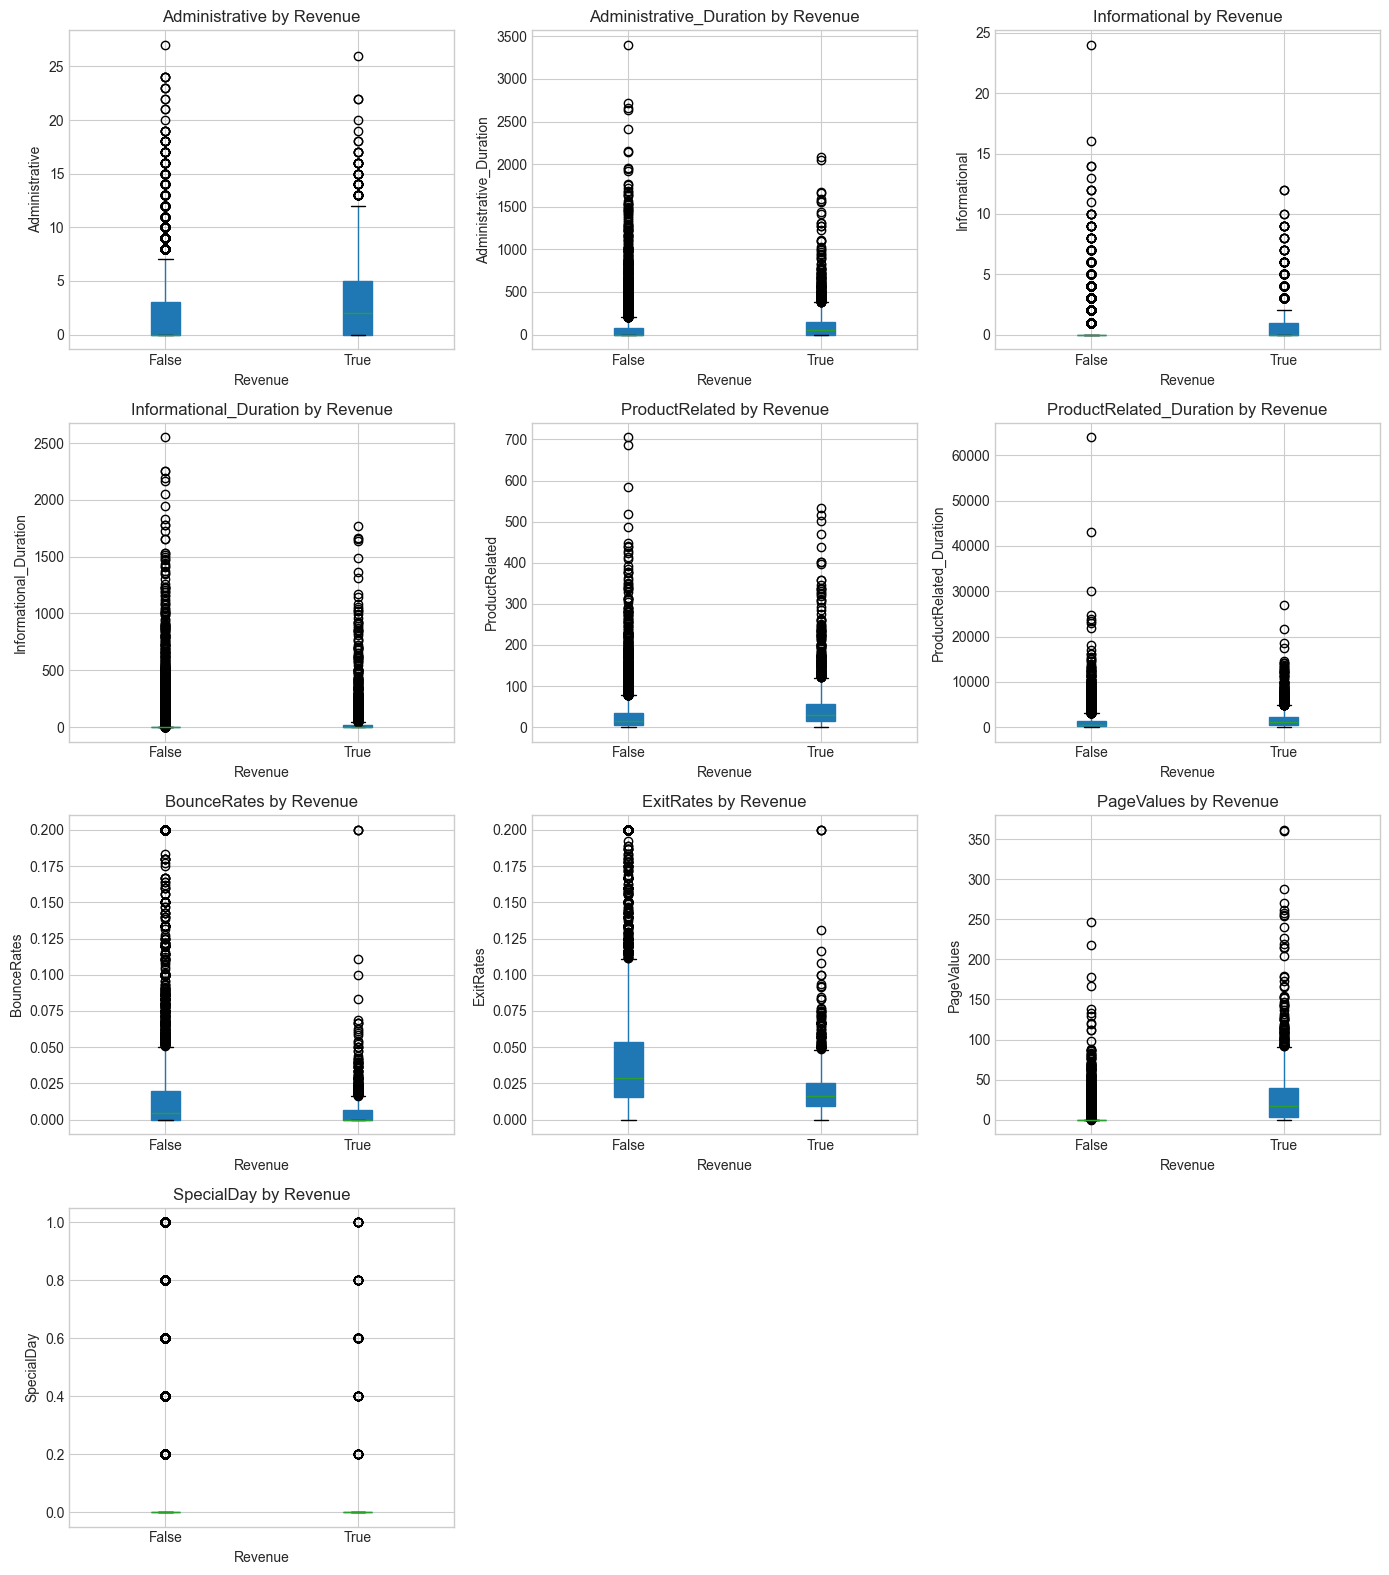

In [16]:
if "Revenue" in df.columns:
    box_cols = [c for c in num_cols if pd.api.types.is_numeric_dtype(df[c])]
    n = len(box_cols); cols = 3; rows = int(np.ceil(n/cols))

    fig, axes = plt.subplots(rows, cols, figsize=(14, 4*rows))
    axes = axes.flatten()

    for i, col in enumerate(box_cols):
        df.boxplot(column=col, by="Revenue", ax=axes[i], patch_artist=True)
        axes[i].set_title(f"{col} by Revenue")
        axes[i].set_xlabel("Revenue")
        axes[i].set_ylabel(col)

    for j in range(i+1, len(axes)):
        axes[j].axis("off")

    plt.suptitle("")  # remove pandas super-title
    plt.tight_layout()
    plt.show()
else:
    print("No 'Revenue' column found; skipping boxplots.")

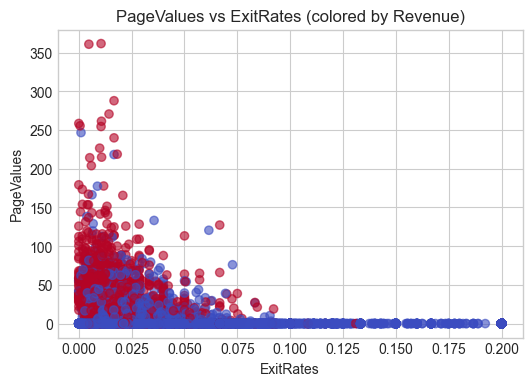

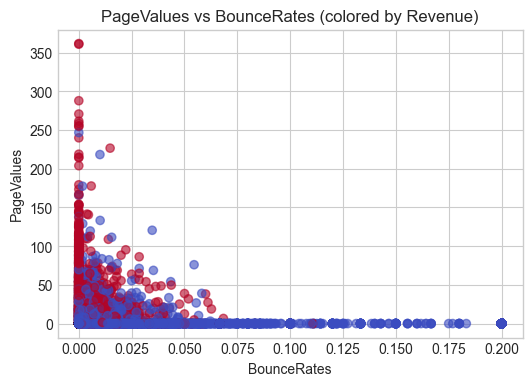

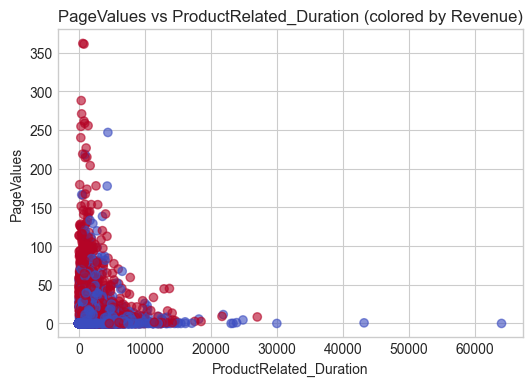

In [17]:
pairs = [
    ("ExitRates", "PageValues"),
    ("BounceRates", "PageValues"),
    ("ProductRelated_Duration", "PageValues")
]

for x, y in pairs:
    if x in df.columns and y in df.columns:
        c = df["Revenue"].astype(int) if "Revenue" in df.columns else None
        plt.figure(figsize=(6,4))
        plt.scatter(df[x], df[y], c=c, cmap="coolwarm", alpha=0.6)
        plt.xlabel(x); plt.ylabel(y)
        plt.title(f"{y} vs {x}" + (" (colored by Revenue)" if c is not None else ""))
        plt.show()


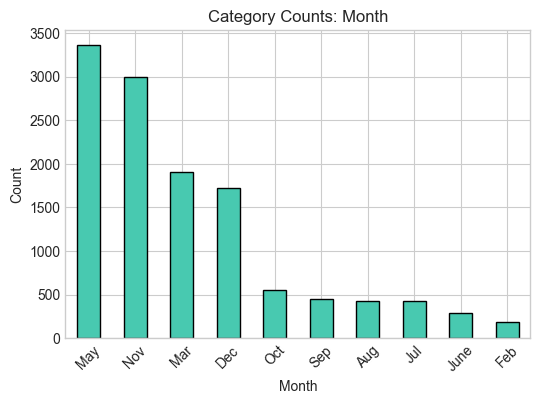

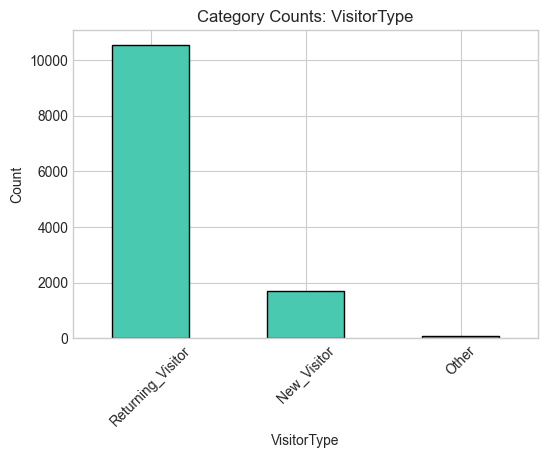

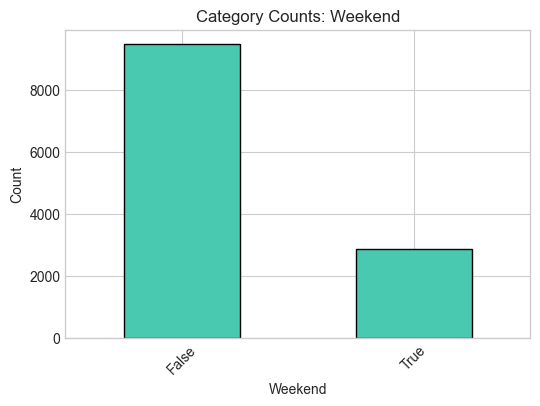

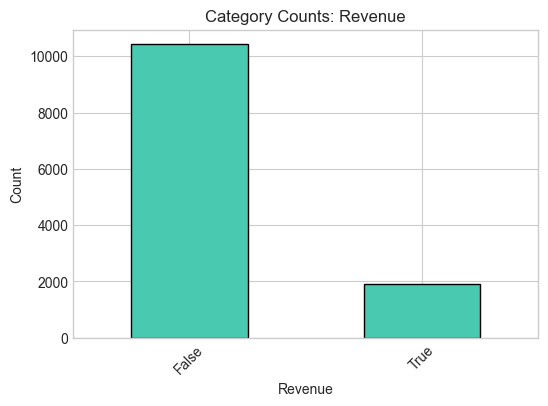

In [18]:
for cat in cat_cols:
    plt.figure(figsize=(6,4))
    df[cat].value_counts(dropna=False).plot(kind="bar", color="#48C9B0", edgecolor="black")
    plt.title(f"Category Counts: {cat}")
    plt.xlabel(cat); plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

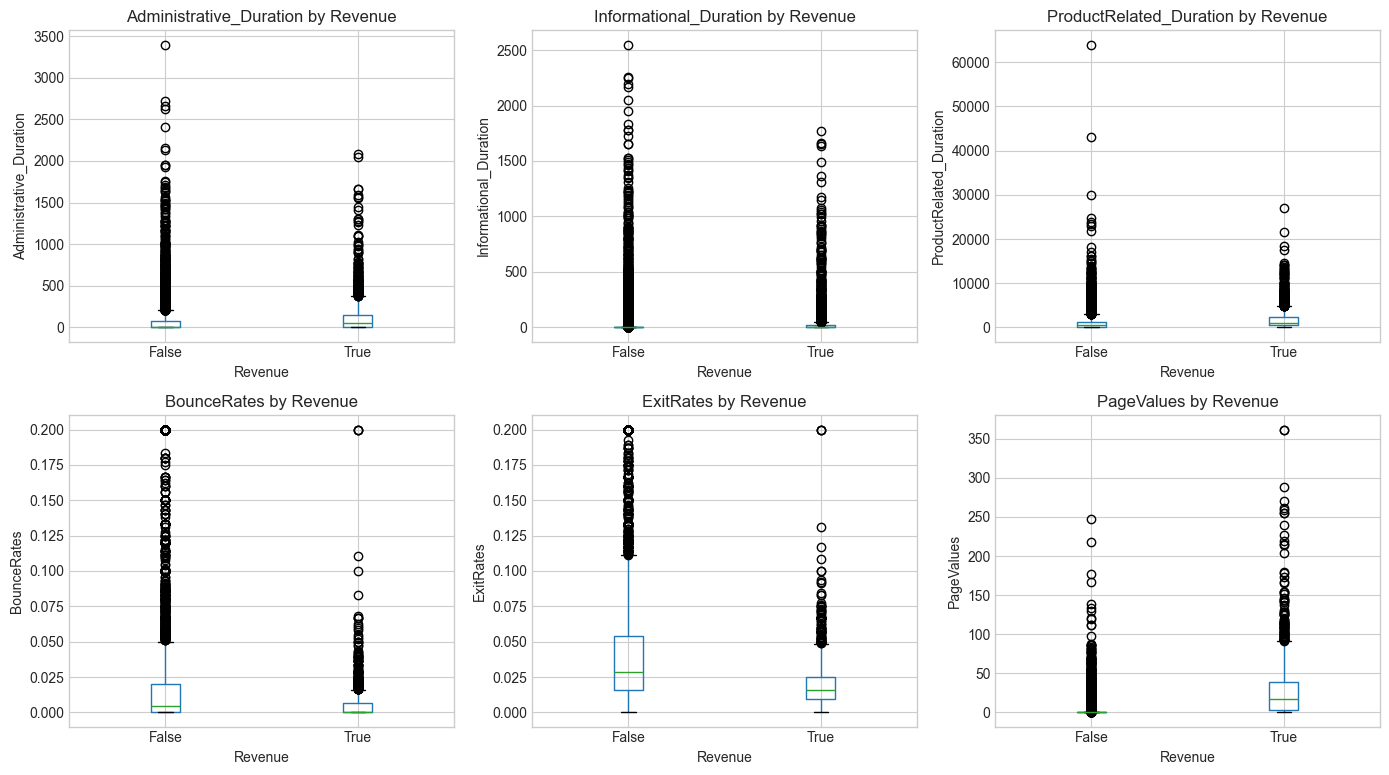

In [19]:
# Cell 5
if "Revenue" in df.columns:
    box_cols = [c for c in [
        "Administrative_Duration", "Informational_Duration",
        "ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues"
    ] if c in df.columns]

    n = len(box_cols)
    cols = 3
    rows = int(np.ceil(n / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(14, 4*rows))
    axes = np.array(axes).reshape(-1)

    for i, col in enumerate(box_cols):
        ax = axes[i]
        df.boxplot(column=col, by="Revenue", ax=ax)
        ax.set_title(f"{col} by Revenue")
        ax.set_xlabel("Revenue")
        ax.set_ylabel(col)
    # remove the automatic super title from pandas
    plt.suptitle("")
    for j in range(i+1, rows*cols):
        axes[j].axis("off")
    fig.tight_layout()
    savefig("boxplots_by_revenue")
    plt.show()
else:
    print("Column 'Revenue' not found; skipping boxplots.")


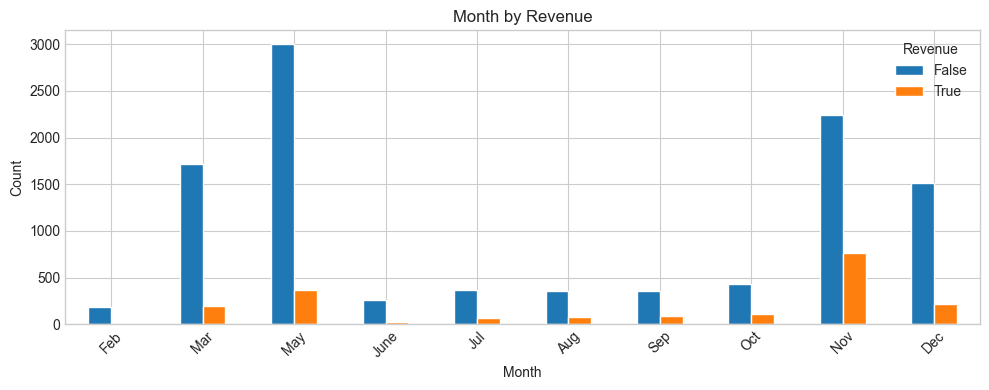

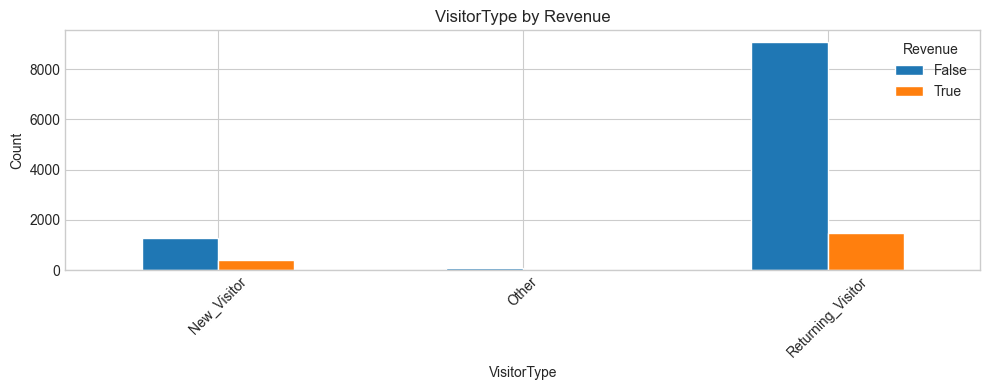

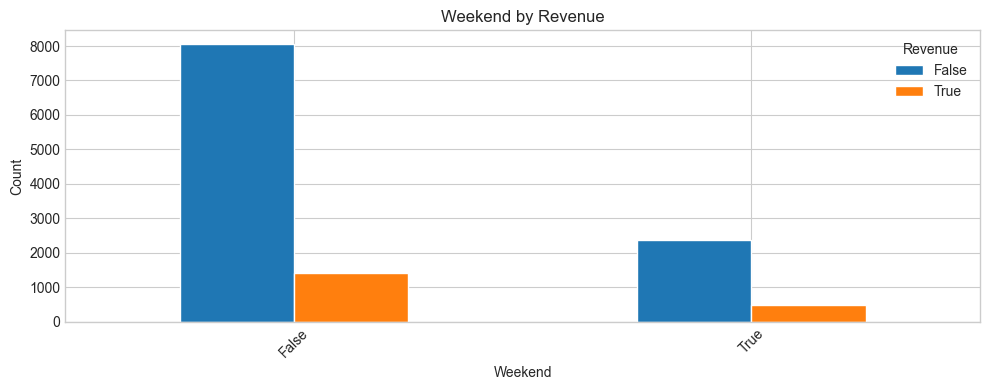

In [20]:
# Cell 6
def bar_by_target(cat_col, target="Revenue"):
    if cat_col not in df.columns or target not in df.columns:
        print(f"Skipping: {cat_col} or {target} missing.")
        return
    ctab = pd.crosstab(df[cat_col], df[target])  # counts by category vs target
    ctab.plot(kind="bar", figsize=(10,4), rot=45)
    plt.title(f"{cat_col} by {target}")
    plt.xlabel(cat_col)
    plt.ylabel("Count")
    plt.tight_layout()
    savefig(f"{cat_col}_by_{target}")
    plt.show()

for cat in ["Month", "VisitorType", "Weekend"]:
    bar_by_target(cat)
